In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('states_all.csv')
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

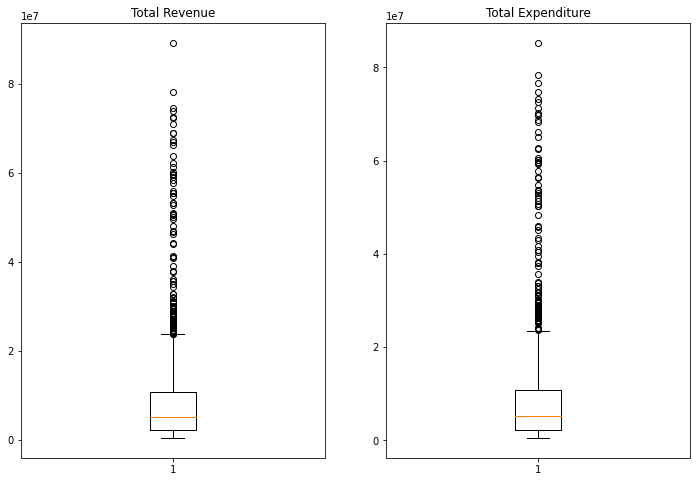

In [9]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.boxplot(df.TOTAL_REVENUE.dropna())
plt.title('Total Revenue')

plt.subplot(1,2,2)
plt.boxplot(df.TOTAL_EXPENDITURE.dropna())
plt.title('Total Expenditure')

plt.show()

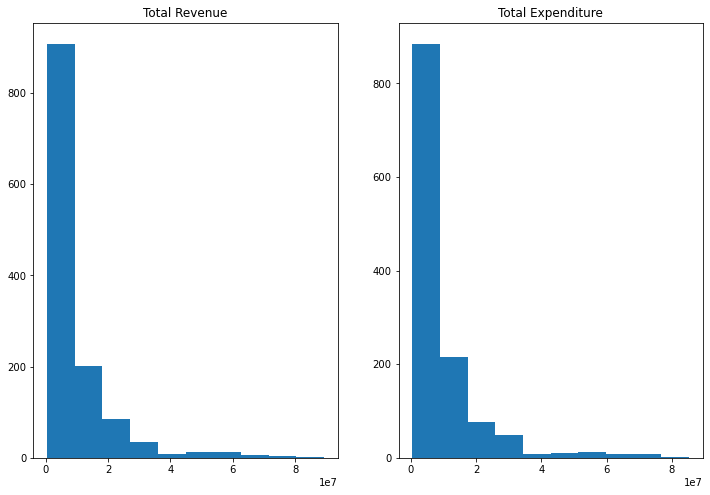

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.hist(df.TOTAL_REVENUE.dropna())
plt.title('Total Revenue')

plt.subplot(1,2,2)
plt.hist(df.TOTAL_EXPENDITURE.dropna())
plt.title('Total Expenditure')

plt.show()

In [11]:
from scipy.stats import zscore

z_scores = zscore(df['TOTAL_REVENUE'].dropna())
for threshold in range(1,5):
    print("Threshold value: {}".format(threshold))
    print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')

Threshold value: 1
Number of Outliers: 134
------
Threshold value: 2
Number of Outliers: 52
------
Threshold value: 3
Number of Outliers: 37
------
Threshold value: 4
Number of Outliers: 21
------


In [12]:
from scipy.stats.mstats import winsorize

winsorizing1 = winsorize(np.array(df.TOTAL_REVENUE.dropna()), (0.10, 0.15))
winsorizing1

masked_array(data=[ 2678885.,  1200186.,  3258079., ...,  3391579.,
                   11697466.,  2044669.],
             mask=False,
       fill_value=1e+20)

In [14]:
winsorizing2 = winsorize(np.array(df.TOTAL_EXPENDITURE.dropna()), (0.10, 0.15))
winsorizing2

masked_array(data=[ 2653798.,  1228869.,  3401580., ...,  3366566.,
                   11787535.,  2034229.],
             mask=False,
       fill_value=1e+20)

In [15]:
np.percentile(df.TOTAL_REVENUE.dropna(),[10,90])

array([ 1202352.4, 21627676.6])

In [16]:
np.percentile(df.TOTAL_EXPENDITURE.dropna(),[10,90])

array([ 1229941.4       , 21929150.40000001])

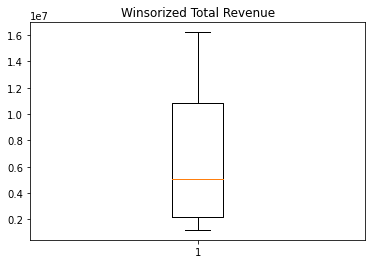

In [17]:
plt.title('Winsorized Total Revenue')
plt.boxplot(winsorizing1)
plt.show()

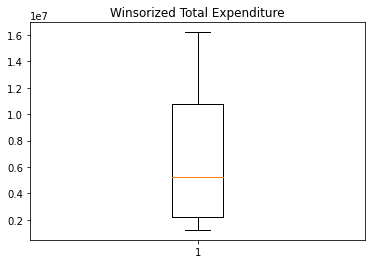

In [18]:
plt.boxplot(winsorizing2)
plt.title('Winsorized Total Expenditure')
plt.show()

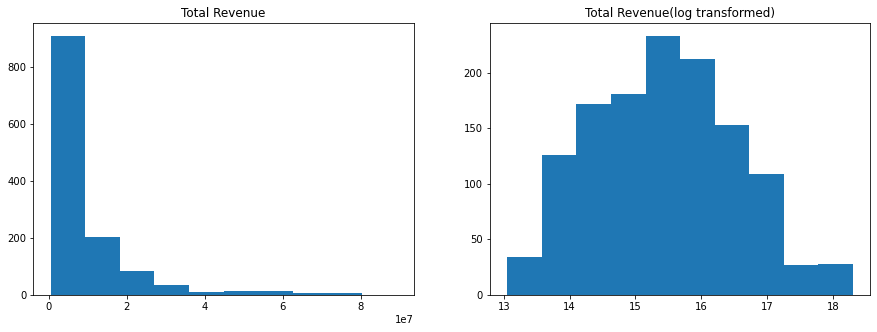

In [19]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df['TOTAL_REVENUE'].dropna())
plt.title('Total Revenue')

plt.subplot(1,2,2)
plt.hist(np.log(df['TOTAL_REVENUE'].dropna()))
plt.title("Total Revenue(log transformed)")
plt.show()

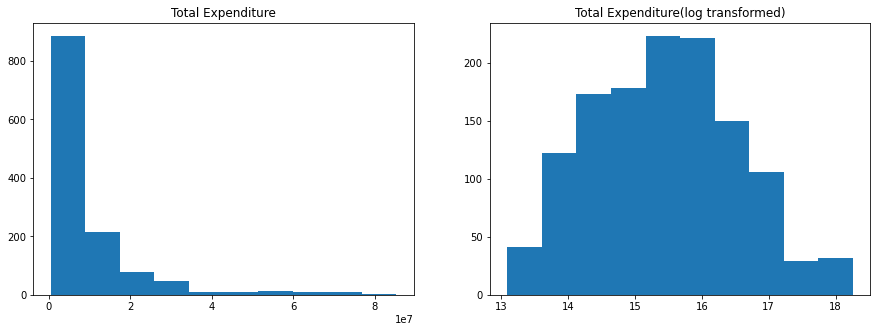

In [20]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(df['TOTAL_EXPENDITURE'].dropna())
plt.title('Total Expenditure')

plt.subplot(1,2,2)
plt.hist(np.log(df['TOTAL_EXPENDITURE'].dropna()))
plt.title("Total Expenditure(log transformed)")
plt.show()

In [21]:
budget_deficit = []

for value in range(0,1714):
  budget_deficit.append( df.TOTAL_REVENUE[value] - df.TOTAL_EXPENDITURE[value] )


budget_deficit = pd.DataFrame(budget_deficit)
budget_deficit.columns = ['BUDGET_DEFICIT']
budget_deficit.head()

,BUDGET_DEFICIT
0,25087.0
1,77103.0
2,-143501.0
3,-31063.0
4,-878807.0


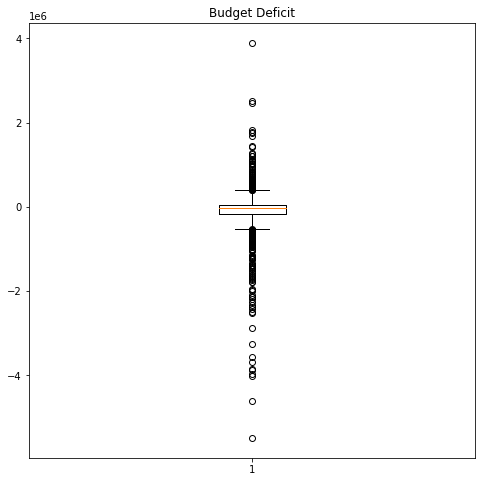

In [22]:
plt.figure(figsize= (8,8))
plt.boxplot(budget_deficit.BUDGET_DEFICIT.dropna())
plt.title('Budget Deficit')
plt.show()

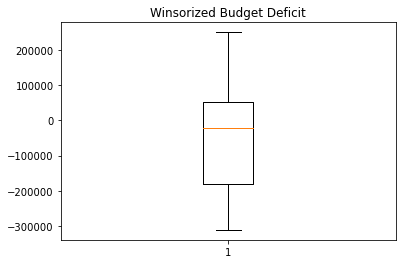

In [23]:
winsorized_budget_deficit = winsorize(np.array(budget_deficit.BUDGET_DEFICIT.dropna()), (0.15, 0.10))

plt.boxplot(winsorized_budget_deficit)
plt.title('Winsorized Budget Deficit')
plt.show()

In [24]:
df.TOTAL_REVENUE.dropna()
df.TOTAL_EXPENDITURE.dropna()

0        2653798.0
1         972488.0
2        3401580.0
3        1743022.0
4       27138832.0
           ...    
1270    16497520.0
1271    15253296.0
1272     3366566.0
1273    11787535.0
1274     2034229.0
Name: TOTAL_EXPENDITURE, Length: 1275, dtype: float64

In [25]:
budget_deficit_2 = []

for value in range(0,1274):
  budget_deficit_2.append( df.TOTAL_REVENUE[value] - df.TOTAL_EXPENDITURE[value] )


budget_deficit_2 = pd.DataFrame(budget_deficit_2)
budget_deficit_2.columns = ['NEW_DEFICIT']
budget_deficit_2.head()

,NEW_DEFICIT
0,25087.0
1,77103.0
2,-143501.0
3,-31063.0
4,-878807.0


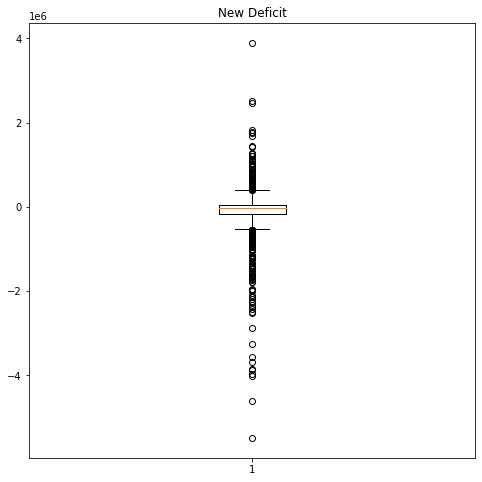

In [26]:
plt.figure(figsize=(8,8))
plt.boxplot(budget_deficit_2.NEW_DEFICIT)
plt.title('New Deficit')
plt.show()

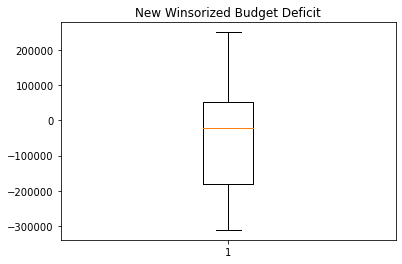

In [27]:
new_winsorized_budget_deficit = winsorize(np.array(budget_deficit_2.NEW_DEFICIT.dropna()), (0.15, 0.10))

plt.boxplot(new_winsorized_budget_deficit)
plt.title('New Winsorized Budget Deficit')
plt.show()

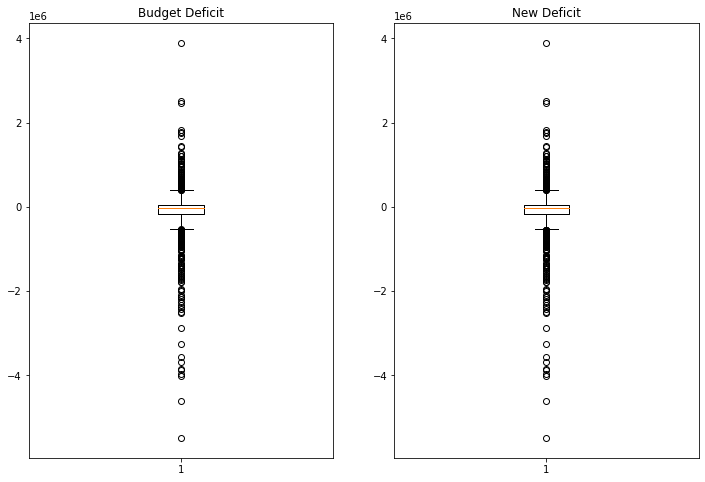

In [28]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.boxplot(budget_deficit.BUDGET_DEFICIT.dropna())
plt.title('Budget Deficit')

plt.subplot(1,2,2)
plt.boxplot(budget_deficit_2.NEW_DEFICIT)
plt.title('New Deficit')

plt.show()

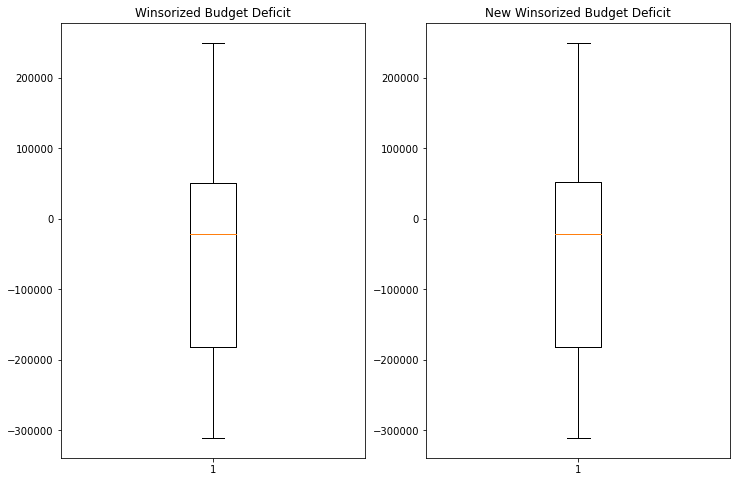

In [29]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.boxplot(winsorized_budget_deficit)
plt.title('Winsorized Budget Deficit')

plt.subplot(1,2,2)
plt.boxplot(new_winsorized_budget_deficit)
plt.title('New Winsorized Budget Deficit')

plt.show()

In [30]:
#I compared both the main and winsorized versions of what I've been given, but I couldn't see any difference. Actually, I thought there would be a difference. In my opinion, it is due to the my humanly-observations or techniques are not sufficient to observe what to get the difference.

In [31]:
"""
If I could've seen the difference, I'd have pick an option.
Anyway, my mind tells me that it is better to deal with the data AFTER dealing
with the missing values first.
"""

"\nIf I could've seen the difference, I'd have pick an option.\nAnyway, my mind tells me that it is better to deal with the data AFTER dealing\nwith the missing values first.\n"